In [1]:
#  Load the "autoreload" extension so that code can change
%load_ext autoreload
%reload_ext autoreload
from pathlib import Path

#  always reload modules so that as you change code in src, it gets loaded
%autoreload 2
%matplotlib inline

import sys
sys.path.append('../')
from src.imports import *
from src.data.download_data import *
from src.data.fire_data import *
from src.data.read_data import *
from src.gen_functions import *
from src.features.dataset import Dataset
from src.features.build_features import *
from src.models.train_model import *
from src.visualization.vis_data import *
import seaborn as sns
output_notebook()
plt.rcParams.update({'font.size': 14})

Loading BokehJS ...

# Build Data

In [2]:
# start building dataset from scratch only perform this when new data files are added 
dataset = Dataset('Nakhon Si Thammarat')
dataset.build_all_data( build_fire=True, build_holiday = True)

th_stations ['42t', 'm3']
no data file for station m3 in folder C:/Users/Benny/Documents/Fern/aqi_thailand2/data/aqm_hourly2/
no data file for station m3 in folder C:/Users/Benny/Documents/Fern/aqi_thailand2/data/aqm_hourly3/
cmu_stations [118]
Averaging data from 4 stations


  0%|                                                                                           | 0/30 [00:00<?, ?it/s]

Loading all hotspots data. This might take sometimes


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [01:16<00:00,  2.54s/it]


before drop (2074896, 20)
after drop (2034622, 12)


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:47<00:00,  1.60s/it]


before drop (2074896, 20)
after drop (2034622, 12)
Getting holiday for  thailand


# Vis Data

In [2]:
# init the data and load saved process data 
dataset = Dataset('Nakhon Si Thammarat')
dataset.load_()
# merge pollution data with other data except fire
dataset.feature_no_fire()

data no fire has shape (39536, 13)


pollutants to plot Index(['PM2.5', 'PM10', 'O3', 'CO', 'NO2', 'SO2'], dtype='object')


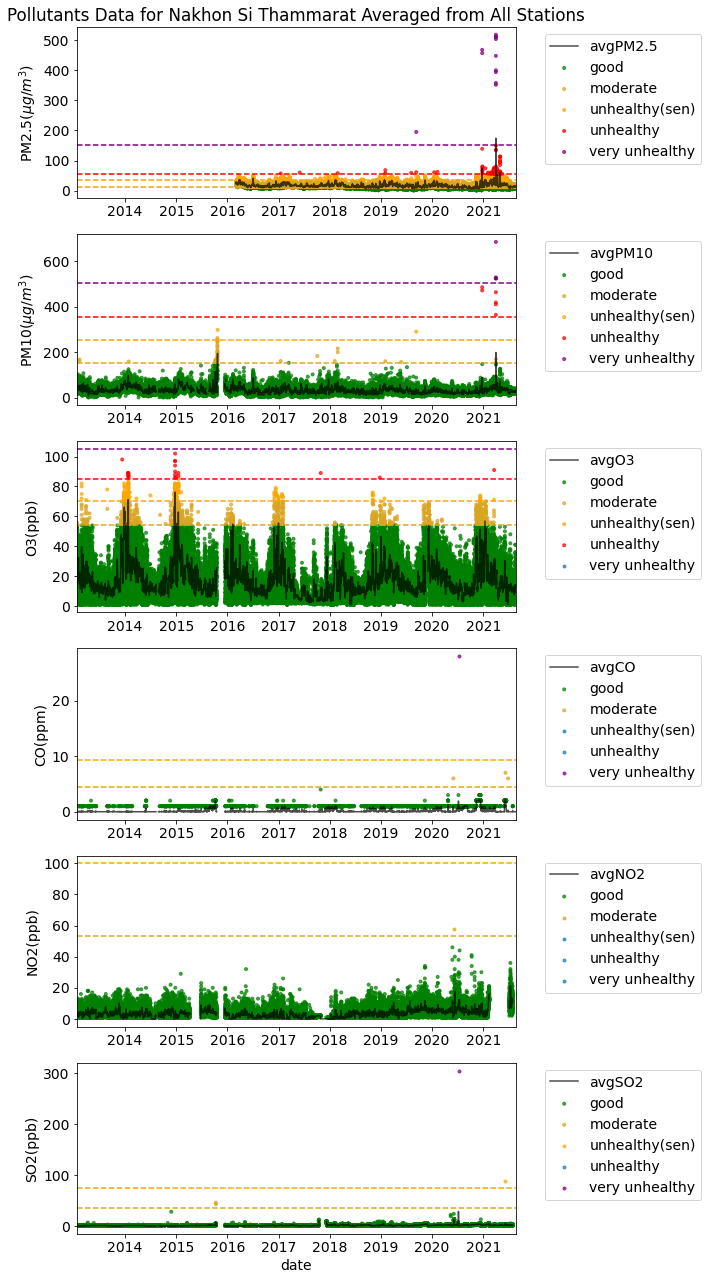

In [3]:
# plot the raw data
plot_all_pollutions(dataset.poll_df, city_name=dataset.city_name)

Actually, we are seeing some seasonal pattern in PM2.5, PM10 and O$_3$.

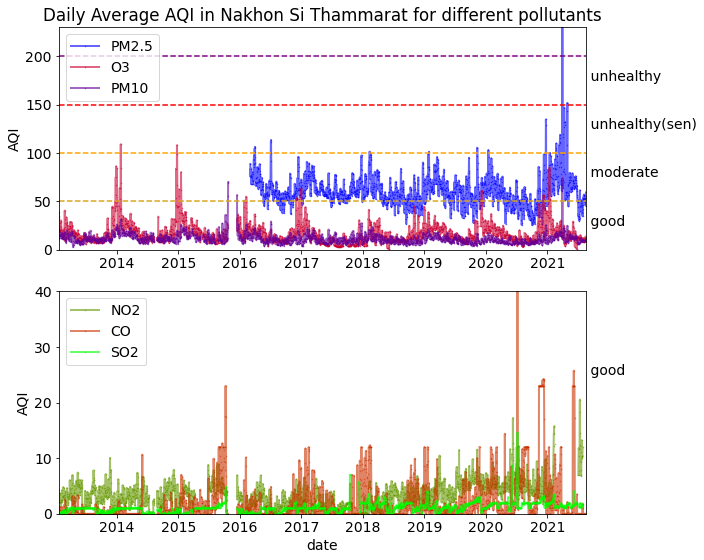

In [4]:
plot_polls_aqi(dataset.poll_df.copy(), dataset.roll_dict, dataset.city_name, filename=dataset.report_folder + 'all_pol_aqi.png' )

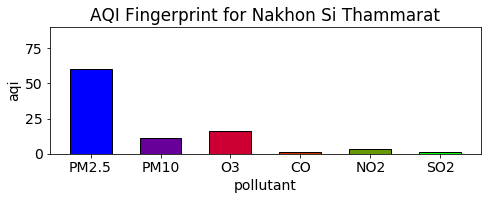

In [38]:
plot_chem_print(poll_to_aqi(dataset.poll_df.copy(), dataset.roll_dict).mean(axis=0), dataset.city_name, filename=dataset.report_folder + 'fingerprint.png')

In [40]:
dataset.poll_df['PM10'].dropna().head()

datetime
2013-01-19 00:00:00    68.0
2013-01-19 01:00:00    58.0
2013-01-19 02:00:00    60.0
2013-01-19 03:00:00    57.0
2013-01-19 04:00:00    46.0
Name: PM10, dtype: float64

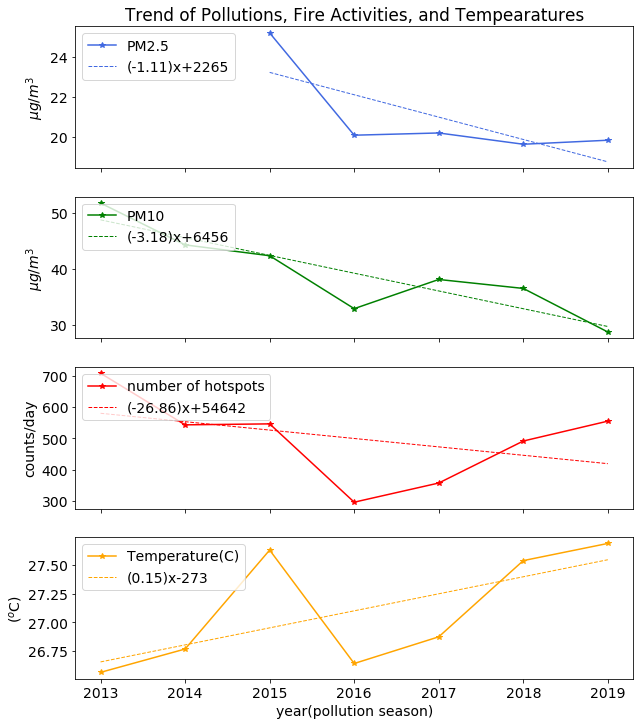

In [42]:
ax, year_avg = plot_yearly_ln(dataset, filename=dataset.report_folder + 'compare_ln_trends.png', min_year=2013)

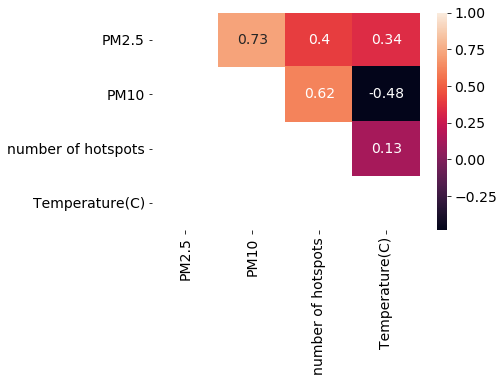

In [43]:
plot_corr(year_avg, figsize=(6,4))

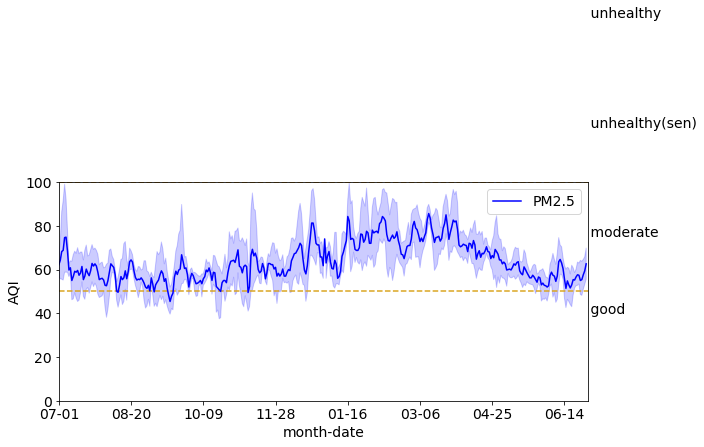

In [9]:
plot_season_aqi(dataset.poll_df.copy(), dataset.roll_dict, 'PM2.5', aqi_text=True)
plt.ylim([0, 100])
plt.savefig(dataset.report_folder + 'seasonal_pattern_PM25.png')

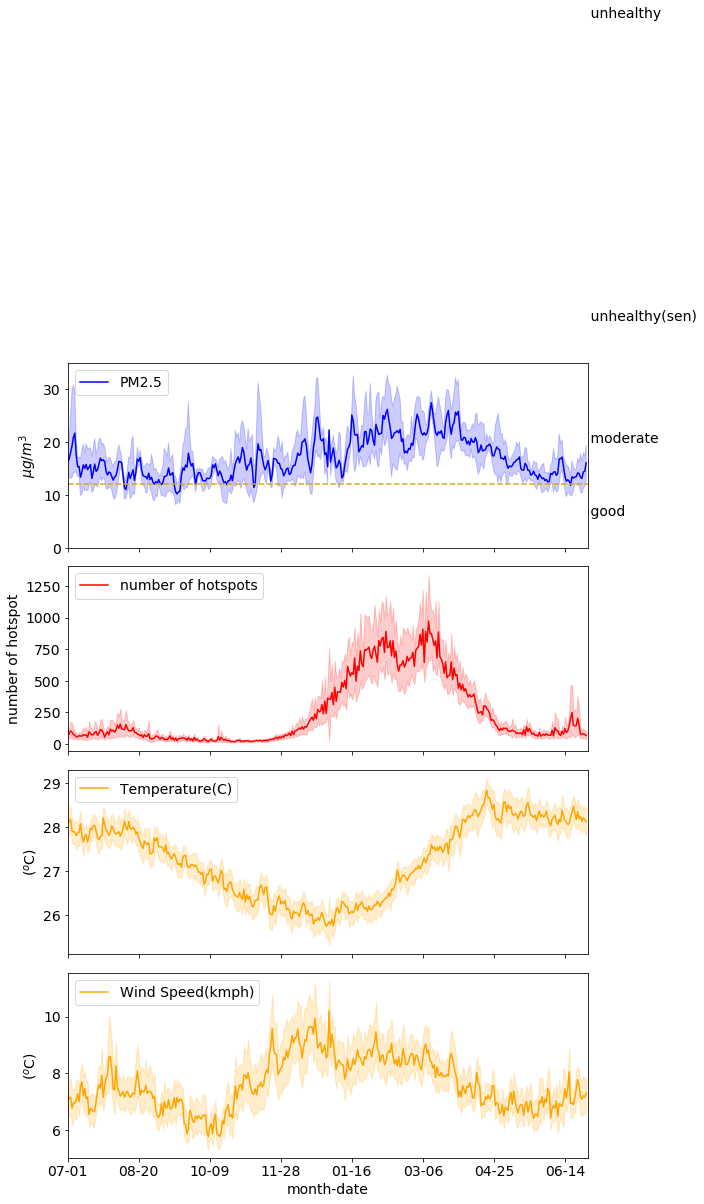

In [8]:
ax = compare_seson_avg(dataset, agg='mean')
ax[0].set_ylim([0,35])

plt.savefig(dataset.report_folder + 'fire_PM25_season.png')

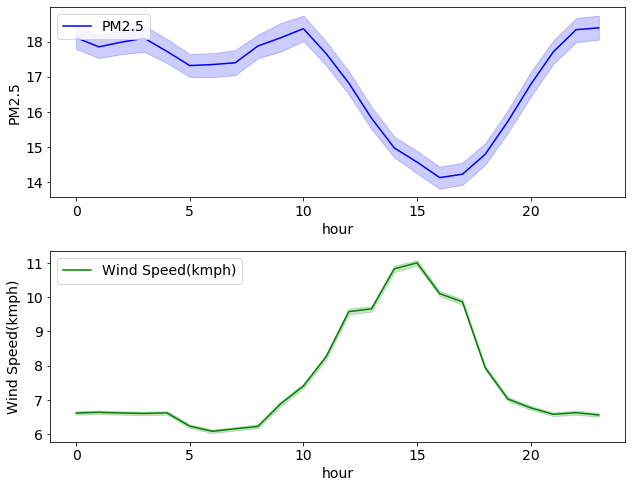

In [46]:
_, ax = plt.subplots(2, 1, figsize=(9, 7))
plot_hour_avg(dataset.poll_df.copy(), 'PM2.5', ax[0],  color='blue')
plot_hour_avg(dataset.wea.copy(), 'Wind_Speed(kmph)', ax[1],  color='green')
plt.tight_layout()

# Train Model

## PM2.5

In [5]:
dataset = Dataset('Nakhon Si Thammarat')

=================find the best RF model=================
best rf score  0.015845603372241945
val score after op_rf {'val_r2_score': 0.0965, 'val_r2': 0.3508, 'val_mean_squared_error': 90.9792, 'val_mean_absolute_error': 7.2864, 'val_mean_absolute_percentage_error': 41.186, 'val_median_absolute_error': 4.6001}
test score after op_rf {'test_r2_score': 0.0489, 'test_r2': 0.2286, 'test_mean_squared_error': 284.2328, 'test_mean_absolute_error': 7.8846, 'test_mean_absolute_percentage_error': 65.0565, 'test_median_absolute_error': 6.0761}
================ remove unncessary columns no lag=================


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:08<00:00,  6.82s/it]


score after dropping columns  {'r2_score': 0.1098, 'r2': 0.3655, 'mean_squared_error': 89.6415, 'mean_absolute_error': 7.2391, 'mean_absolute_percentage_error': 41.4551, 'median_absolute_error': 4.6028}
export figure as  C:/Users/Benny/Documents/Fern/aqi_thailand2/reports/nakhon_si_thammarat/_PM25_rf_fea_op2.png
================= find the best fire feature ===================
optimizing fire parameter using skopt optimizer. This will take about 20 mins
new fire parameter {'w_speed': 5.0, 'shift': -10, 'roll': 118, 'damp_surface': 1.0, 'wind_damp': 1, 'wind_lag': 0, 'split_direct': 0} give score = 74.22203770317725
op fire give val score {'val_r2_score': 0.2699, 'val_r2': 0.4771, 'val_mean_squared_error': 73.8928, 'val_mean_absolute_error': 6.5662, 'val_mean_absolute_percentage_error': 42.3513, 'val_median_absolute_error': 4.6412}
op fire give test score {'test_r2_score': 0.0793, 'test_r2': 0.3051, 'test_mean_squared_error': 276.4952, 'test_mean_absolute_error': 7.5836, 'test_mean_absol

  0%|                                                                                           | 0/80 [00:00<?, ?it/s]

op4 test score {'test_r2_score': 0.0784, 'test_r2': 0.318, 'test_mean_squared_error': 275.1833, 'test_mean_absolute_error': 7.5652, 'test_mean_absolute_percentage_error': 63.6913, 'test_median_absolute_error': 5.9514}
================= remove unncessary lag columns =================


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [23:35<00:00, 17.70s/it]


score after dropping columns  {'r2_score': 0.2831, 'r2': 0.5079, 'mean_squared_error': 72.2305, 'mean_absolute_error': 6.3699, 'mean_absolute_percentage_error': 39.0181, 'median_absolute_error': 4.29}
best rf score  0.171663129019424
val score after op6 {'val_r2_score': 0.2852, 'val_r2': 0.507, 'val_mean_squared_error': 72.0138, 'val_mean_absolute_error': 6.3732, 'val_mean_absolute_percentage_error': 39.4522, 'val_median_absolute_error': 4.3285}
test score after op6  {'testop6_r2_score': 0.0783, 'testop6_r2': 0.3168, 'testop6_mean_squared_error': 275.2062, 'testop6_mean_absolute_error': 7.5778, 'testop6_mean_absolute_percentage_error': 63.85, 'testop6_median_absolute_error': 5.9613}
final score for test set {'test_r2_score': 0.0926, 'test_r2': 0.3356, 'test_mean_squared_error': 270.972, 'test_mean_absolute_error': 7.3488, 'test_mean_absolute_percentage_error': 61.2017, 'test_median_absolute_error': 5.6378}
daily avg score for test set {'avg_test_r2_score': 0.1786, 'avg_test_r2': 0.4815

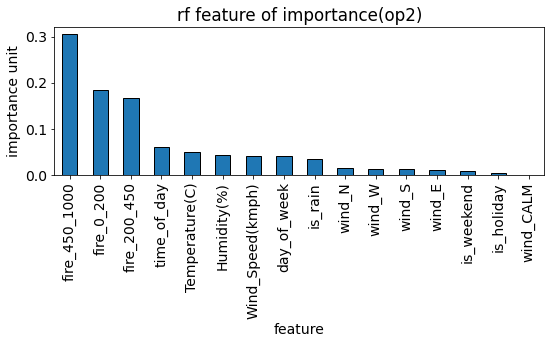

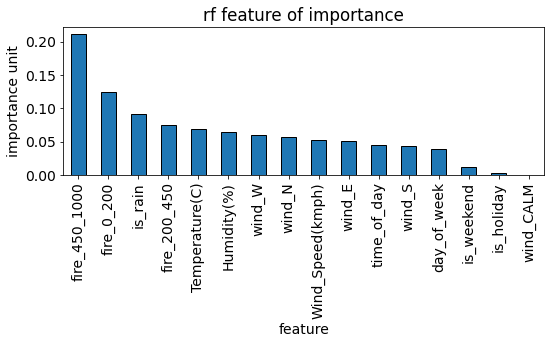

In [6]:
%%time 
 
filename = dataset.model_folder + 'PM25_model_meta.json'
model_meta = load_meta(filename)
model_meta['rolling'] = 1
model_meta['zone_list'] = [0, 200, 450,  1000]
model_meta['cat_hour'] = 0
model_meta['cat_month'] = 0
model_meta['split_lists'] = [[0.55, 0.2, 0.25], [0.55, 0.2, 0.25], [0.75, 0.25]]

save_meta(filename, model_meta)
# training 24 hour avg center
dataset, model, trainer = train_city_s1(city='Nakhon Si Thammarat', pollutant= 'PM2.5', instr='MODIS', add_weight=True, op_fire_zone=True, op_lag=True, choose_cat_hour=True, choose_cat_month=False)

In [7]:
dataset, model, fire_cols, zone_list, feat_imp, roll_win = load_model(city='Nakhon Si Thammarat', pollutant='PM2.5')

raw model performance {'test_r2_score': 0.0919, 'test_r2': 0.3345, 'test_mean_squared_error': 270.7026, 'test_mean_absolute_error': 7.3238, 'test_mean_absolute_percentage_error': 60.9542, 'test_median_absolute_error': 5.6293}
daily avg training error {'avg_trn_r2_score': 0.8726, 'avg_trn_r2': 0.9448, 'avg_trn_mean_squared_error': 3.8694, 'avg_trn_mean_absolute_error': 1.5495, 'avg_trn_mean_absolute_percentage_error': 10.0363, 'avg_trn_median_absolute_error': 1.3107}
daily avg test error {'avg_test_r2_score': 0.1784, 'avg_test_r2': 0.4819, 'avg_test_mean_squared_error': 106.6155, 'avg_test_mean_absolute_error': 5.7431, 'avg_test_mean_absolute_percentage_error': 38.6355, 'avg_test_median_absolute_error': 4.4445}


In [7]:
dataset, model, fire_cols, zone_list, feat_imp, roll_win = load_model(city='Nakhon Si Thammarat', pollutant='PM2.5')

data no fire has shape (39354, 13)
raw model performance {'test_r2_score': 0.24592234377442423, 'test_mean_squared_error': 38.60906614523281, 'test_mean_absolute_error': 4.986220794159069}
daily avg training error {'avg_trn_r2_score': 0.7137586008314185, 'avg_trn_mean_squared_error': 8.474823075899312, 'avg_trn_mean_absolute_error': 2.1601304672152177}
daily avg test error {'avg_test_r2_score': 0.32232564577960554, 'avg_test_mean_squared_error': 24.052891876813504, 'avg_test_mean_absolute_error': 3.959751672399534}


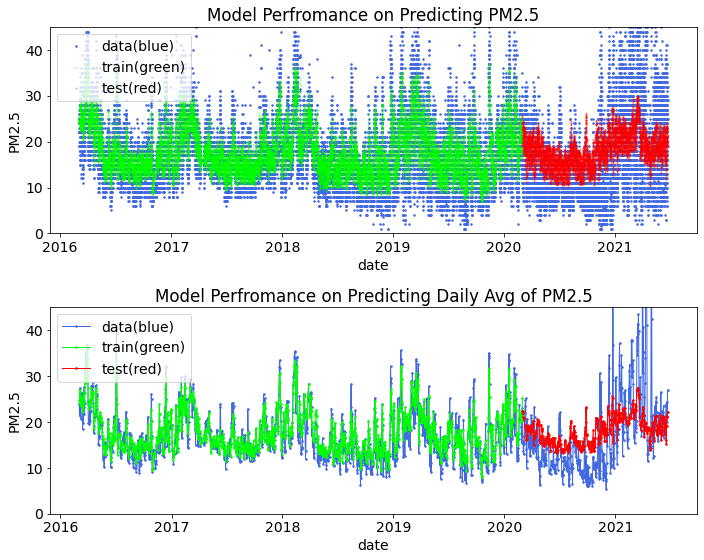

In [8]:
ytrn_pred_df, ytest_pred_df = plot_model_perf(dataset=dataset, model=model, split_list=[0.75, 0.25], ylim=[0, 45], to_save=False)


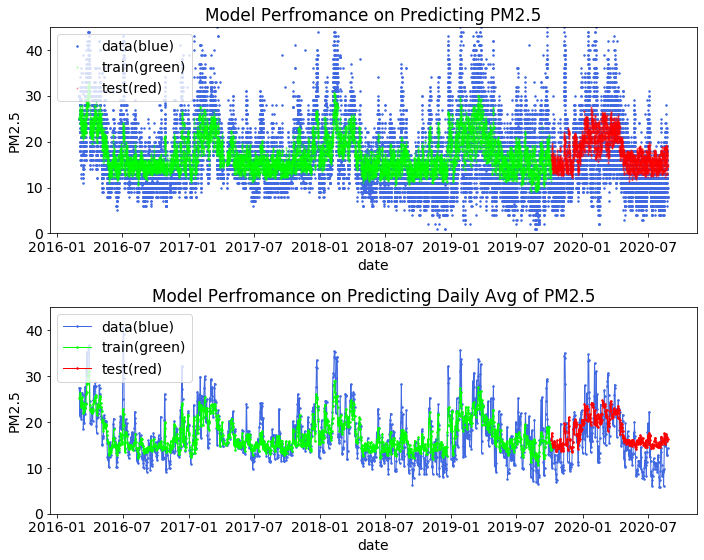

In [9]:
ytrn_pred_df, ytest_pred_df = plot_model_perf(dataset=dataset, model=model, split_list=[0.8, 0.2], ylim=[0, 45], to_save=False)


## PM10

data no fire has shape (63702, 13)
=================optimize 1: find the best RF model=================
xtrn has shape (37890, 15)
{'n_estimators': 180, 'min_samples_split': 10, 'min_samples_leaf': 12, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True} 0.12579327507672616
val score after op_rf {'val_r2_score': 0.20744245571778386, 'val_mean_squared_error': 194.67276778092346, 'val_mean_absolute_error': 10.710438464750982}
test score after op_rf {'test_r2_score': -0.5008921565951658, 'test_mean_squared_error': 194.93602857506346, 'test_mean_absolute_error': 11.468289825800548}
=================optimize 2: remove unncessary columns=================
old cols length 15
drop is_weekend
drop wind_E
drop day_of_week
use columns ['Temperature(C)', 'Humidity(%)', 'Wind_Speed(kmph)', 'wind_N', 'wind_S', 'wind_W', 'is_rain', 'is_holiday', 'time_of_day', 'fire_0_200', 'fire_200_450', 'fire_450_1000']
score after dropping columns {'r2_score': 0.20989978271474896, 'mean_squared_error': 19

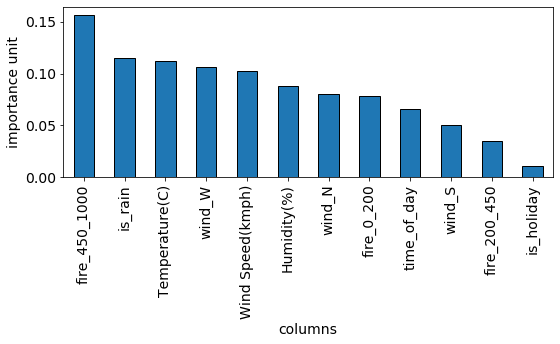

In [11]:
dataset, model, poll_meta = train_city_s1(city= 'Nakhon Si Thammarat', pollutant='PM10', op_fire_twice=False, search_wind_damp=True)

In [16]:
dataset, model, fire_cols, zone_list, feat_imp, roll_win = load_model(city='Nakhon Si Thammarat', pollutant='PM10')

data no fire has shape (64186, 13)
raw model performance {'test_r2_score': -0.3105519141708424, 'test_mean_squared_error': 170.565583493367, 'test_mean_absolute_error': 10.533474167091933}
daily avg training error {'avg_trn_r2_score': 0.6818034681581372, 'avg_trn_mean_squared_error': 66.51186523468733, 'avg_trn_mean_absolute_error': 5.350419986419105}
daily avg test error {'avg_test_r2_score': -0.6274352224777835, 'avg_test_mean_squared_error': 111.42352273377928, 'avg_test_mean_absolute_error': 8.88572015648171}


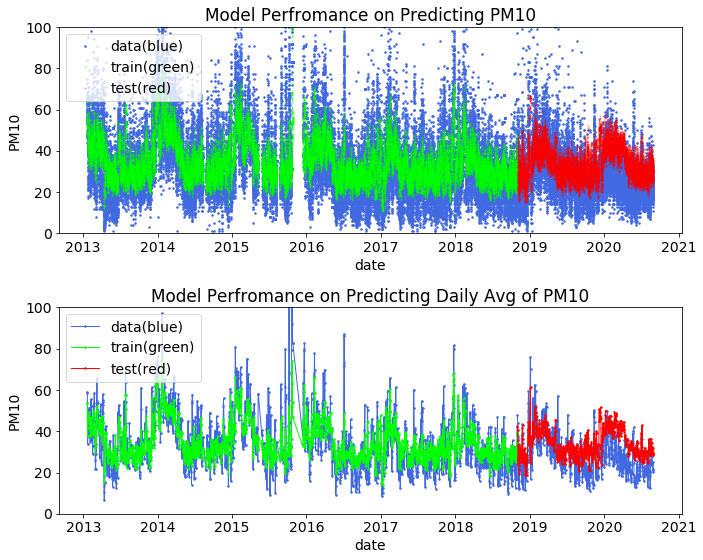

In [17]:
ytrn_pred_df, ytest_pred_df = plot_model_perf(dataset=dataset, model=model, split_list=[0.75, 0.25], ylim=[0, 100], to_save=False)


## O3

data no fire has shape (65041, 13)
=================optimize 1: find the best RF model=================
xtrn has shape (38664, 15)
{'n_estimators': 160, 'min_samples_split': 5, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False} 0.49229963422745493
val score after op_rf {'val_r2_score': 0.3218236786616061, 'val_mean_squared_error': 98.69897590610077, 'val_mean_absolute_error': 7.404126179979789}
test score after op_rf {'test_r2_score': 0.5775967662197903, 'test_mean_squared_error': 64.5890433338434, 'test_mean_absolute_error': 5.9462099078511885}
=================optimize 2: remove unncessary columns=================
old cols length 15
drop is_rain
drop wind_E
drop wind_W
drop wind_S
use columns ['Temperature(C)', 'Humidity(%)', 'Wind_Speed(kmph)', 'wind_N', 'is_holiday', 'is_weekend', 'day_of_week', 'time_of_day', 'fire_0_200', 'fire_200_450', 'fire_450_1000']
score after dropping columns {'r2_score': 0.32575643434393997, 'mean_squared_error': 98.1266

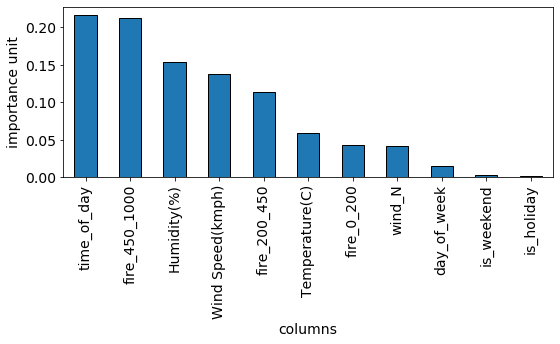

In [12]:
dataset, model, poll_meta = train_city_s1(city= 'Nakhon Si Thammarat', pollutant='O3', op_fire_twice=False, search_wind_damp=True)

In [18]:
dataset, model, fire_cols, zone_list, feat_imp, roll_win = load_model(city='Nakhon Si Thammarat', pollutant='O3')

data no fire has shape (65100, 13)
raw model performance {'test_r2_score': 0.5255280834958755, 'test_mean_squared_error': 72.47379340336356, 'test_mean_absolute_error': 6.089820488373891}
daily avg training error {'avg_trn_r2_score': 0.7472002750554902, 'avg_trn_mean_squared_error': 25.37328235354361, 'avg_trn_mean_absolute_error': 3.6622238454051934}
daily avg test error {'avg_test_r2_score': 0.3502868593653514, 'avg_test_mean_squared_error': 38.248493849792474, 'avg_test_mean_absolute_error': 4.495770866823353}


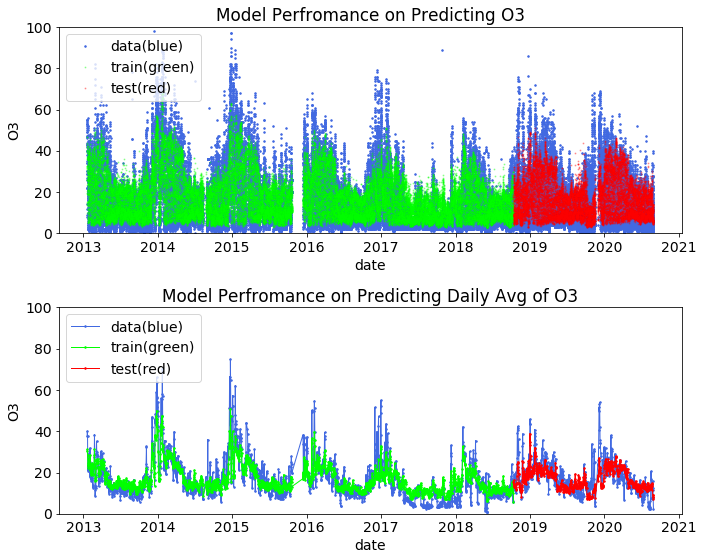

In [19]:
ytrn_pred_df, ytest_pred_df = plot_model_perf(dataset=dataset, model=model, split_list=[0.75, 0.25], ylim=[0, 100], to_save=False)
